In [1]:
# import libraries

import geopandas as gpd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Census County Data

In [2]:
# read us counties file
us_counties = gpd.read_file('../Data/tl_2022_us_county/tl_2022_us_county.shp')

In [3]:
us_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,NaN,NaN,NaN,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,NaN,NaN,NaN,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,NaN,NaN,NaN,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,NaN,NaN,NaN,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,NaN,NaN,NaN,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [4]:
# filter counties to only include oregon
or_counties = us_counties.loc[us_counties['STATEFP'] == '41'].to_crs('EPSG:32610')

In [5]:
or_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
18,41,063,01155135,41063,Wallowa,Wallowa County,06,H1,G4020,NaN,NaN,NaN,A,8147835328,14191752,+45.5937530,-117.1855796,"POLYGON ((951271.626 5008172.487, 951272.326 5..."
87,41,013,01155128,41013,Crook,Crook County,06,H1,G4020,NaN,NaN,NaN,A,7715390857,21004473,+44.1630537,-120.3715849,"POLYGON ((730696.277 4924633.426, 732156.897 4..."
123,41,005,01155127,41005,Clackamas,Clackamas County,06,H1,G4020,NaN,NaN,NaN,A,4845115802,31863504,+45.1604934,-122.1951274,"POLYGON ((557545.113 5034472.536, 557589.984 5..."
171,41,007,01135846,41007,Clatsop,Clatsop County,06,H1,G4020,NaN,NaN,NaN,A,2144781264,661720213,+46.0245094,-123.7050366,"POLYGON ((448508.819 5069223.299, 447621.066 5..."
202,41,035,01155134,41035,Klamath,Klamath County,06,H1,G4020,NaN,NaN,NaN,A,15410373388,484953082,+42.6837613,-121.6461682,"POLYGON ((558461.584 4751172.166, 558550.065 4..."


# Census Tract Data

In [6]:
# read oregon census tract file
or_tract = gpd.read_file('../Data/tl_2022_41_tract/tl_2022_41_tract.shp')

In [7]:
or_tract.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,41,015,950302,41015950302,9503.02,Census Tract 9503.02,G5020,S,8831275,4126242,+42.0628105,-124.2960404,"POLYGON ((-124.32851 42.06741, -124.32813 42.0..."
1,41,015,950301,41015950301,9503.01,Census Tract 9503.01,G5020,S,1471037379,24387422,+42.2661637,-124.1650816,"POLYGON ((-124.41779 42.25254, -124.41661 42.2..."
2,41,015,950100,41015950100,9501,Census Tract 9501,G5020,S,1690327400,98894328,+42.7148490,-124.1810565,"POLYGON ((-124.61952 42.80166, -124.61858 42.8..."
3,41,011,000702,41011000702,7.02,Census Tract 7.02,G5020,S,28036755,980057,+43.3160168,-124.2282540,"POLYGON ((-124.26404 43.29416, -124.26391 43.2..."
4,41,011,001102,41011001102,11.02,Census Tract 11.02,G5020,S,680843621,2235826,+43.1317684,-123.9875674,"POLYGON ((-124.35057 43.12684, -124.35054 43.1..."


# Merge County Data

In [8]:
# read internet county speed data from NTIA csv file
county_data_df = pd.read_csv('../Data/broadband_counties.csv')

In [9]:
county_data_df.head()

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,...,Percent of Population whose income in the past 12 months is below poverty level - Margin of Error,Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),M-Lab Median Download Speed (Mbps),M-Lab Median Upload Speed (Mbps),Microsoft Broadband Usage Percentage,Microsoft Broadband Usage,Shape__Area,Shape__Length
0,1,1001,Autauga County,Alabama,21559,366,8.6,1.005340,15.3,1.841693,...,2.138023,110.944000,11.835,56145.0,85.347031,17.304867,0.8057,0.391,249970.1918,2.208588e+09
1,2,1003,Baldwin County,Alabama,84047,1143,8.2,0.794065,11.9,1.054878,...,0.999039,40.535999,13.101,229287.0,29.566347,5.575569,0.8362,0.452,537587.2607,5.911175e+09
2,3,1005,Barbour County,Alabama,9322,338,20.2,2.613101,29.0,2.871257,...,2.897247,45.056000,10.854,24589.0,56.418366,8.076088,0.6891,0.324,320882.8479,3.257907e+09
3,4,1007,Bibb County,Alabama,7259,299,16.8,3.850855,20.9,3.362702,...,3.614489,22.660999,4.546,22136.0,16.868685,6.865757,0.3368,0.136,227920.0610,2.311978e+09
4,5,1009,Blount County,Alabama,21205,430,15.0,1.636814,18.5,1.949670,...,1.571379,36.444000,9.309,57879.0,26.013332,4.149326,0.7580,0.199,292630.2869,2.456904e+09


In [10]:
# filter counties to only include oregon
or_county_df = county_data_df[county_data_df['State'] == 'Oregon']

In [11]:
or_county_df.head()

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,...,Percent of Population whose income in the past 12 months is below poverty level - Margin of Error,Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),M-Lab Median Download Speed (Mbps),M-Lab Median Upload Speed (Mbps),Microsoft Broadband Usage Percentage,Microsoft Broadband Usage,Shape__Area,Shape__Length
2207,2208,41001,Baker County,Oregon,7158,238,10.6,2.023399,16.6,2.381939,...,2.523116,25.309999,7.443,16284.0,38.818657,8.091613,0.7059,0.380,781325.3229,1.583659e+10
2208,2209,41003,Benton County,Oregon,36051,535,3.7,0.799804,5.1,0.909420,...,1.320246,81.684998,8.762,93239.0,67.522560,5.884386,0.9951,0.747,329988.9263,3.452166e+09
2209,2210,41005,Clackamas County,Oregon,159330,657,5.1,0.502913,7.5,0.535112,...,0.504855,101.217003,13.575,421585.0,59.254623,6.928912,0.9695,0.804,518972.0915,9.818086e+09
2210,2211,41007,Clatsop County,Oregon,16019,399,7.7,1.296733,11.2,1.731795,...,1.239517,38.249001,9.942,40423.0,64.503746,10.204513,0.8239,0.788,359091.4438,4.579317e+09
2211,2212,41009,Columbia County,Oregon,19872,326,7.8,1.327413,10.1,1.657366,...,1.346453,55.771000,6.247,52876.0,25.950663,3.338619,0.8067,0.277,257215.9178,3.689688e+09


In [12]:
# create matching columns to merge datasets
or_county_df['Geographic Identifier - FIPS Code'] = or_county_df['Geographic Identifier - FIPS Code'].astype(str).str[2:]

/var/folders/9_/7w6dl5dd3z718l85r306bpmr0000gn/T/ipykernel_63573/2840755677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  or_county_df['Geographic Identifier - FIPS Code'] = or_county_df['Geographic Identifier - FIPS Code'].astype(str).str[2:]


In [13]:
or_county_df.head()

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,...,Percent of Population whose income in the past 12 months is below poverty level - Margin of Error,Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),M-Lab Median Download Speed (Mbps),M-Lab Median Upload Speed (Mbps),Microsoft Broadband Usage Percentage,Microsoft Broadband Usage,Shape__Area,Shape__Length
2207,2208,001,Baker County,Oregon,7158,238,10.6,2.023399,16.6,2.381939,...,2.523116,25.309999,7.443,16284.0,38.818657,8.091613,0.7059,0.380,781325.3229,1.583659e+10
2208,2209,003,Benton County,Oregon,36051,535,3.7,0.799804,5.1,0.909420,...,1.320246,81.684998,8.762,93239.0,67.522560,5.884386,0.9951,0.747,329988.9263,3.452166e+09
2209,2210,005,Clackamas County,Oregon,159330,657,5.1,0.502913,7.5,0.535112,...,0.504855,101.217003,13.575,421585.0,59.254623,6.928912,0.9695,0.804,518972.0915,9.818086e+09
2210,2211,007,Clatsop County,Oregon,16019,399,7.7,1.296733,11.2,1.731795,...,1.239517,38.249001,9.942,40423.0,64.503746,10.204513,0.8239,0.788,359091.4438,4.579317e+09
2211,2212,009,Columbia County,Oregon,19872,326,7.8,1.327413,10.1,1.657366,...,1.346453,55.771000,6.247,52876.0,25.950663,3.338619,0.8067,0.277,257215.9178,3.689688e+09


In [14]:
# merge the county data frame and county geodata frame
merged_county_df = pd.merge(or_county_df, or_counties[['COUNTYFP','geometry']], left_on='Geographic Identifier - FIPS Code', right_on='COUNTYFP')

In [15]:
merged_county_df.head()

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,...,Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),M-Lab Median Download Speed (Mbps),M-Lab Median Upload Speed (Mbps),Microsoft Broadband Usage Percentage,Microsoft Broadband Usage,Shape__Area,Shape__Length,COUNTYFP,geometry
0,2208,001,Baker County,Oregon,7158,238,10.6,2.023399,16.6,2.381939,...,7.443,16284.0,38.818657,8.091613,0.7059,0.380,781325.3229,1.583659e+10,001,"POLYGON ((971346.826 4971683.717, 971280.869 4..."
1,2209,003,Benton County,Oregon,36051,535,3.7,0.799804,5.1,0.909420,...,8.762,93239.0,67.522560,5.884386,0.9951,0.747,329988.9263,3.452166e+09,003,"POLYGON ((463639.104 4903144.774, 463605.515 4..."
2,2210,005,Clackamas County,Oregon,159330,657,5.1,0.502913,7.5,0.535112,...,13.575,421585.0,59.254623,6.928912,0.9695,0.804,518972.0915,9.818086e+09,005,"POLYGON ((557545.113 5034472.536, 557589.984 5..."
3,2211,007,Clatsop County,Oregon,16019,399,7.7,1.296733,11.2,1.731795,...,9.942,40423.0,64.503746,10.204513,0.8239,0.788,359091.4438,4.579317e+09,007,"POLYGON ((448508.819 5069223.299, 447621.066 5..."
4,2212,009,Columbia County,Oregon,19872,326,7.8,1.327413,10.1,1.657366,...,6.247,52876.0,25.950663,3.338619,0.8067,0.277,257215.9178,3.689688e+09,009,"POLYGON ((514640.448 5084493.700, 514618.876 5..."


In [17]:
# convert pandas data frame to geopandas data frame
merged_county_gdf = gpd.GeoDataFrame(merged_county_df, geometry='geometry')

In [19]:
merged_county_gdf.head()

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,...,Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),M-Lab Median Download Speed (Mbps),M-Lab Median Upload Speed (Mbps),Microsoft Broadband Usage Percentage,Microsoft Broadband Usage,Shape__Area,Shape__Length,COUNTYFP,geometry
0,2208,001,Baker County,Oregon,7158,238,10.6,2.023399,16.6,2.381939,...,7.443,16284.0,38.818657,8.091613,0.7059,0.380,781325.3229,1.583659e+10,001,"POLYGON ((971346.826 4971683.717, 971280.869 4..."
1,2209,003,Benton County,Oregon,36051,535,3.7,0.799804,5.1,0.909420,...,8.762,93239.0,67.522560,5.884386,0.9951,0.747,329988.9263,3.452166e+09,003,"POLYGON ((463639.104 4903144.774, 463605.515 4..."
2,2210,005,Clackamas County,Oregon,159330,657,5.1,0.502913,7.5,0.535112,...,13.575,421585.0,59.254623,6.928912,0.9695,0.804,518972.0915,9.818086e+09,005,"POLYGON ((557545.113 5034472.536, 557589.984 5..."
3,2211,007,Clatsop County,Oregon,16019,399,7.7,1.296733,11.2,1.731795,...,9.942,40423.0,64.503746,10.204513,0.8239,0.788,359091.4438,4.579317e+09,007,"POLYGON ((448508.819 5069223.299, 447621.066 5..."
4,2212,009,Columbia County,Oregon,19872,326,7.8,1.327413,10.1,1.657366,...,6.247,52876.0,25.950663,3.338619,0.8067,0.277,257215.9178,3.689688e+09,009,"POLYGON ((514640.448 5084493.700, 514618.876 5..."


# Merge Tract Data

In [20]:
# read internet tract speed data from NTIA file
tract_data_df = pd.read_csv('../Data/broadband_tracts.csv')

In [21]:
# filter tracts to only include oregon
or_tract_df = tract_data_df[tract_data_df['State'] == 'Oregon']

In [22]:
or_tract_df.head()

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,County,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,Percent of Population whose income in the past 12 months is below poverty level,Percent of Population whose income in the past 12 months is below poverty level - Margin of Error,Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps),Form 477 All Terrestrial Broadband: Max Advertised Consumer Upload Speed (Mbps),Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),Shape__Area,Shape__Length
21650,21651,41003000202,Census Tract 2.02,Oregon,Benton County,2454,269,3.7,2.699807,2.0,1.861138,14.4,5.817572,1200.0,1000.0,103.164001,10.559,5520.0,31321.343010,2.694922e+07
21651,21652,41003000900,Census Tract 9,Oregon,Benton County,2570,243,1.2,1.318345,1.2,1.318345,15.0,5.538008,1200.0,50.0,102.272003,6.279,5741.0,20490.445590,1.891101e+07
21652,21653,41003001001,Census Tract 10.01,Oregon,Benton County,1767,171,5.8,2.772856,6.9,3.040060,25.2,7.067309,1200.0,940.0,68.652000,5.990,3979.0,9583.734089,3.232659e+06
21653,21654,41003001002,Census Tract 10.02,Oregon,Benton County,1327,126,4.1,3.974535,5.1,4.191902,19.3,6.972464,1200.0,940.0,130.837997,10.781,3258.0,7595.785067,3.265330e+06
21654,21655,41003001101,Census Tract 11.01,Oregon,Benton County,1351,171,2.9,2.863533,8.4,4.539254,54.4,11.882873,1200.0,940.0,74.942001,6.287,3743.0,4747.330396,1.318794e+06


In [23]:
# create matching columns to merge datasets
or_tract_df['Geographic Identifier - FIPS Code'] = or_tract_df['Geographic Identifier - FIPS Code'].astype(str).str[5:]

/var/folders/9_/7w6dl5dd3z718l85r306bpmr0000gn/T/ipykernel_63573/2798129607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  or_tract_df['Geographic Identifier - FIPS Code'] = or_tract_df['Geographic Identifier - FIPS Code'].astype(str).str[5:]


In [24]:
or_tract_df.head()

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,County,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,Percent of Population whose income in the past 12 months is below poverty level,Percent of Population whose income in the past 12 months is below poverty level - Margin of Error,Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps),Form 477 All Terrestrial Broadband: Max Advertised Consumer Upload Speed (Mbps),Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),Shape__Area,Shape__Length
21650,21651,000202,Census Tract 2.02,Oregon,Benton County,2454,269,3.7,2.699807,2.0,1.861138,14.4,5.817572,1200.0,1000.0,103.164001,10.559,5520.0,31321.343010,2.694922e+07
21651,21652,000900,Census Tract 9,Oregon,Benton County,2570,243,1.2,1.318345,1.2,1.318345,15.0,5.538008,1200.0,50.0,102.272003,6.279,5741.0,20490.445590,1.891101e+07
21652,21653,001001,Census Tract 10.01,Oregon,Benton County,1767,171,5.8,2.772856,6.9,3.040060,25.2,7.067309,1200.0,940.0,68.652000,5.990,3979.0,9583.734089,3.232659e+06
21653,21654,001002,Census Tract 10.02,Oregon,Benton County,1327,126,4.1,3.974535,5.1,4.191902,19.3,6.972464,1200.0,940.0,130.837997,10.781,3258.0,7595.785067,3.265330e+06
21654,21655,001101,Census Tract 11.01,Oregon,Benton County,1351,171,2.9,2.863533,8.4,4.539254,54.4,11.882873,1200.0,940.0,74.942001,6.287,3743.0,4747.330396,1.318794e+06


In [25]:
# merge the tract data frame and tract geodata frame
merged_tract_df = pd.merge(or_tract_df, or_tract[['TRACTCE','geometry']], left_on='Geographic Identifier - FIPS Code', right_on='TRACTCE')

In [26]:
# convert pandas data frame to geopandas data frame
merged_tract_gdf = gpd.GeoDataFrame(merged_tract_df, geometry='geometry')

In [27]:
merged_tract_gdf.head()

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,County,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,...,Percent of Population whose income in the past 12 months is below poverty level - Margin of Error,Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps),Form 477 All Terrestrial Broadband: Max Advertised Consumer Upload Speed (Mbps),Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),Shape__Area,Shape__Length,TRACTCE,geometry
0,21651,000202,Census Tract 2.02,Oregon,Benton County,2454,269,3.7,2.699807,2.0,...,5.817572,1200.0,1000.0,103.164001,10.559,5520.0,31321.343010,2.694922e+07,000202,"POLYGON ((-122.00223 43.61565, -122.00207 43.6..."
1,21651,000202,Census Tract 2.02,Oregon,Benton County,2454,269,3.7,2.699807,2.0,...,5.817572,1200.0,1000.0,103.164001,10.559,5520.0,31321.343010,2.694922e+07,000202,"POLYGON ((-123.34435 44.53982, -123.34398 44.5..."
2,21651,000202,Census Tract 2.02,Oregon,Benton County,2454,269,3.7,2.699807,2.0,...,5.817572,1200.0,1000.0,103.164001,10.559,5520.0,31321.343010,2.694922e+07,000202,"POLYGON ((-122.89365 42.32367, -122.89259 42.3..."
3,21651,000202,Census Tract 2.02,Oregon,Benton County,2454,269,3.7,2.699807,2.0,...,5.817572,1200.0,1000.0,103.164001,10.559,5520.0,31321.343010,2.694922e+07,000202,"POLYGON ((-122.65115 45.49033, -122.65038 45.4..."
4,21695,000202,Census Tract 2.02,Oregon,Jackson County,1334,241,4.4,2.656030,7.8,...,7.062268,1000.0,940.0,94.164001,11.254,3798.0,6838.304926,1.891918e+06,000202,"POLYGON ((-122.00223 43.61565, -122.00207 43.6..."


# County Statistics and Map

In [28]:
# show county table
merged_county_gdf

,OBJECTID,Geographic Identifier - FIPS Code,Name,State,Total households,Total households - Margin of Error,"Percent of Households that Have No Computer, Smartphone, or Tablet","Percent of Households that Have No Computer, Smartphone, or Tablet - Margin of Error",Percent of Households with No Internet Access,Percent of Households with No Internet Access - Margin of Error,...,Ookla Median Upload Speed (Mbps),Population 2020 (FCC Estimate),M-Lab Median Download Speed (Mbps),M-Lab Median Upload Speed (Mbps),Microsoft Broadband Usage Percentage,Microsoft Broadband Usage,Shape__Area,Shape__Length,COUNTYFP,geometry
0,2208,001,Baker County,Oregon,7158,238,10.6,2.023399,16.6,2.381939,...,7.443000,16284.0,38.818657,8.091613,0.7059,0.380,7.813253e+05,1.583659e+10,001,"POLYGON ((971346.826 4971683.717, 971280.869 4..."
1,2209,003,Benton County,Oregon,36051,535,3.7,0.799804,5.1,0.909420,...,8.762000,93239.0,67.522560,5.884386,0.9951,0.747,3.299889e+05,3.452166e+09,003,"POLYGON ((463639.104 4903144.774, 463605.515 4..."
2,2210,005,Clackamas County,Oregon,159330,657,5.1,0.502913,7.5,0.535112,...,13.575000,421585.0,59.254623,6.928912,0.9695,0.804,5.189721e+05,9.818086e+09,005,"POLYGON ((557545.113 5034472.536, 557589.984 5..."
3,2211,007,Clatsop County,Oregon,16019,399,7.7,1.296733,11.2,1.731795,...,9.942000,40423.0,64.503746,10.204513,0.8239,0.788,3.590914e+05,4.579317e+09,007,"POLYGON ((448508.819 5069223.299, 447621.066 5..."
4,2212,009,Columbia County,Oregon,19872,326,7.8,1.327413,10.1,1.657366,...,6.247000,52876.0,25.950663,3.338619,0.8067,0.277,2.572159e+05,3.689688e+09,009,"POLYGON ((514640.448 5084493.700, 514618.876 5..."
5,2213,011,Coos County,Oregon,27819,496,11.6,1.644232,15.3,1.947198,...,11.309000,64711.0,54.330952,9.747436,0.8966,0.622,4.502786e+05,7.926573e+09,011,"POLYGON ((392581.336 4817180.567, 392509.627 4..."
6,2214,013,Crook County,Oregon,9998,285,8.0,2.047716,13.6,2.642066,...,4.582000,25104.0,32.322701,4.422442,0.9163,0.371,5.908937e+05,1.502659e+10,013,"POLYGON ((730696.277 4924633.426, 732156.897 4..."
7,2215,015,Curry County,Oregon,10790,349,10.5,2.441696,16.4,3.293963,...,9.754000,23304.0,58.226631,8.529182,0.9423,0.517,5.767959e+05,7.790687e+09,015,"POLYGON ((360630.431 4736723.091, 360717.049 4..."
8,2216,017,Deschutes County,Oregon,77040,740,4.6,0.795739,7.8,1.070817,...,7.158000,201756.0,60.746330,5.480547,0.9745,0.693,7.382864e+05,1.524792e+10,017,"POLYGON ((651669.282 4892658.938, 651675.599 4..."
9,2217,019,Douglas County,Oregon,46439,556,10.3,1.063144,14.1,1.163531,...,11.363000,111363.0,50.236408,10.228702,0.9300,0.635,9.263910e+05,2.478613e+10,019,"POLYGON ((558419.332 4767312.628, 558420.678 4..."


In [31]:
# sort data to create table that shows fastest to slowest internet speeds in counties
avg_d_sorted = merged_county_gdf.sort_values(by='M-Lab Median Download Speed (Mbps)', ascending = False)

avg_d_table = avg_d_sorted[['Name', 'M-Lab Median Download Speed (Mbps)']]

print(avg_d_table)

                 Name  M-Lab Median Download Speed (Mbps)
33  Washington County                           68.566750
1       Benton County                           67.522560
26        Polk County                           65.026161
3      Clatsop County                           64.503746
24      Morrow County                           62.245735
34     Wheeler County                           62.108860
8    Deschutes County                           60.746330
23      Marion County                           60.561226
2    Clackamas County                           59.254623
7        Curry County                           58.226631
17     Klamath County                           55.426216
5         Coos County                           54.330952
9      Douglas County                           50.236408
27     Sherman County                           50.068367
20     Lincoln County                           48.097988
14     Jackson County                           45.165977
19        Lane

In [40]:
# map the counties
labels = ["0 to 15 Mbps", "15 to 30 Mbps", "30 to 45 Mbps", "45 to 60 Mbps", "60 to 75 Mbps"]

merged_county_gdf['group'] = pd.cut(merged_county_gdf['M-Lab Median Download Speed (Mbps)'],
                                   (0, 15, 30, 45, 60, 75), right=False, labels=labels)

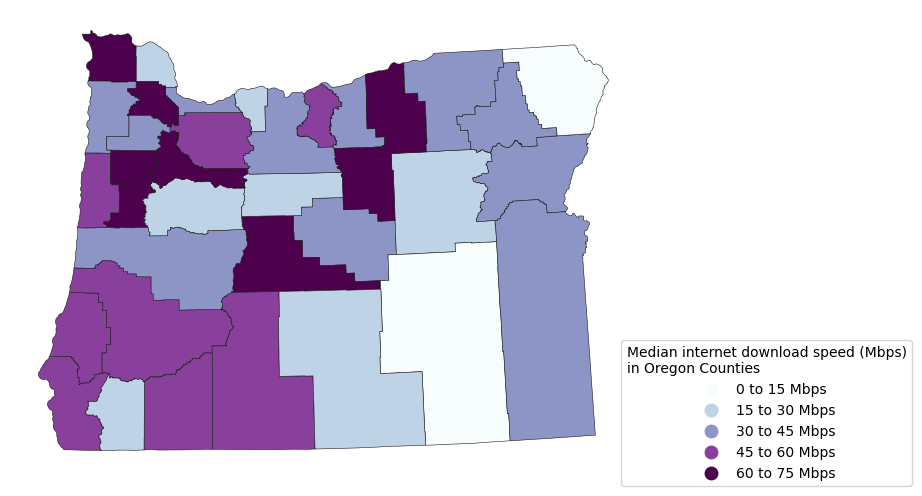

In [47]:
fig, ax = plt.subplots(1, figsize=(16, 6))

merged_county_gdf.plot(column='group', cmap='BuPu', linewidth=0.4, ax=ax, edgecolor='0.1', legend=True)

ax.axis('off')

legend = ax.get_legend()
legend.set_bbox_to_anchor((1.45, 0.3))
legend.set_title('Median internet download speed (Mbps)\nin Oregon Counties')

In [49]:
# save map to asset folder
fig.savefig('assets/or_county_speeds.png', dpi=300, bbox_inches='tight')